In [1]:
import experimenting
import event_library as el
import torch
from matplotlib import pyplot as plt
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d
from experimenting.utils.skeleton_helpers import Skeleton

In [2]:
hw = el.utils.get_hw_property('dvs')

In [3]:
core = experimenting.dataset.HumanCore('test', '/data/gscarpellini/dataset/human3.6m/constant_count', '/data/gscarpellini/dataset/human3.6m/constant_count/3d_joints.npz', 'cross-subject', 1)
#core = experimenting.dataset.HumanCore('test', '../scripts/h3m/out/', '../scripts/h3m/out/3d_joints.npz', 'cross-subject', 1)

No handles with labels found to put in legend.


{'subject': 6, 'action': 'Smoking 1', 'cam': 0, 'frame': '0000149'}


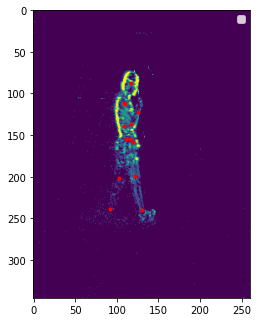

In [48]:
idx = 221104
print(core.frames_info[idx+1])
sk, intr, extr = core.get_joint_from_id(idx)
frame = core.get_frame_from_id(idx)
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
#plot_skeleton_3d(sk)
plot_skeleton_2d(frame.squeeze(), joints)

In [5]:
from experimenting.dataset.factory import Joints3DConstructor

In [10]:
train, val, test = Joints3DConstructor().get_datasets(core, {'apply':{}}, {'apply':{}})


In [50]:
x, y = train[100]

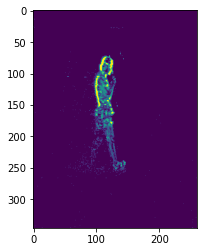

In [51]:
plt.imshow(x)

No handles with labels found to put in legend.


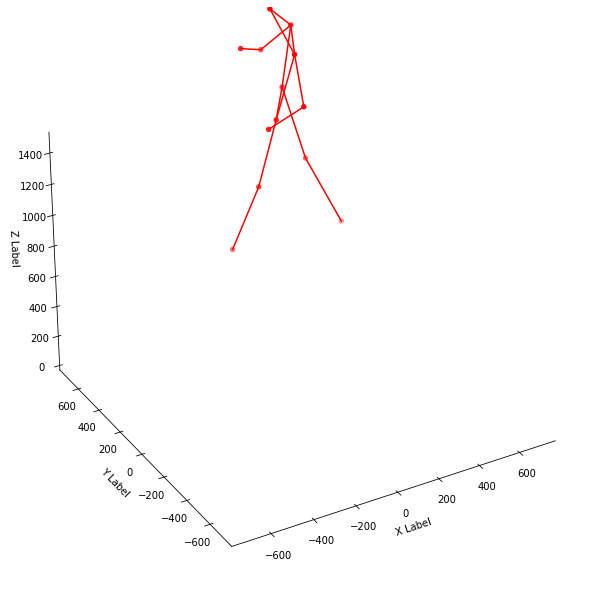

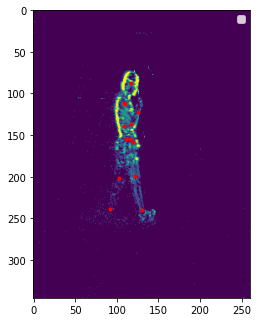

In [52]:
sk = Skeleton(y['xyz'])
plot_skeleton_3d(sk)
joints = sk1.get_2d_points(260, 346, intrinsic_matrix=y['camera'], extrinsic_matrix=y['M'])
#plot_skeleton_3d(sk)
plot_skeleton_2d(frame1.squeeze(), joints)

In [47]:
train.x_indexes[100]

221104

In [54]:
y['xyz']

tensor([[ 477.9706, 1121.1703, 1718.4548],
        [ 650.2708, 1236.1722, 1496.0900],
        [ 533.3580,  998.0369, 1469.8500],
        [ 589.6566, 1407.7786, 1256.3386],
        [ 521.7993,  896.3400, 1186.7893],
        [ 627.6251, 1278.0701, 1064.6959],
        [ 464.8966, 1046.2898, 1030.8407],
        [ 413.3811, 1277.6769, 1392.1417],
        [ 416.6386, 1030.2448,  993.0792],
        [ 710.0284, 1206.2610,  590.5703],
        [ 410.6701, 1115.3622,  552.2688],
        [ 845.9606, 1107.3452,  160.8658],
        [ 309.0634, 1185.6332,  107.7902]])